<style> html {font-size:12} </style>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 1.- Regresión Lineal ordinaria
<span style="font-size:12pt"> a)

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<span style="font-size:12pt"> Debido a que lo que se quiere estudiar es el precio de las casas los atributos de id, fecha y código postal son irrelevantes, entonces se eliminan estas caracteristicas del dataset con la línea 4.
Notar que la fecha y ubicación puede influr, pero en este caso todas las casa están en la misma locación y se venden en un corto periodo de tiempo (1 año).</span>

<span style="font-size:12pt"> b)

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<span style="font-size:12pt">Son 21613 entradas de datos, estas entradas tienen 18 atributos (precio, dormitorios, baños, etc) no nulos. Hay detalles estadisticos sobre el conjunto de muestra por atributo en la tabla que se muestra arriba con el metodo `.describe()`</span>

<span style="font-size:12pt">c) </span>

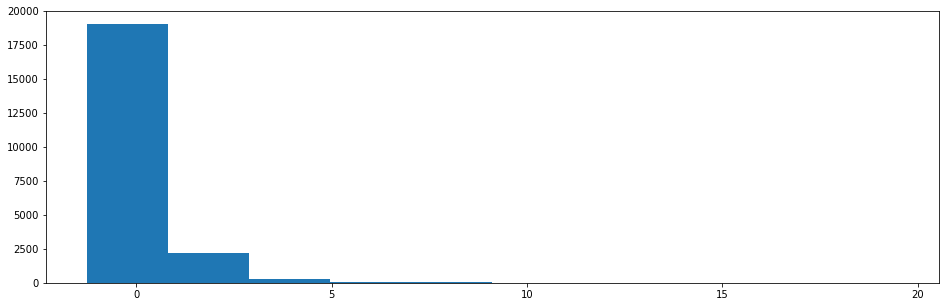

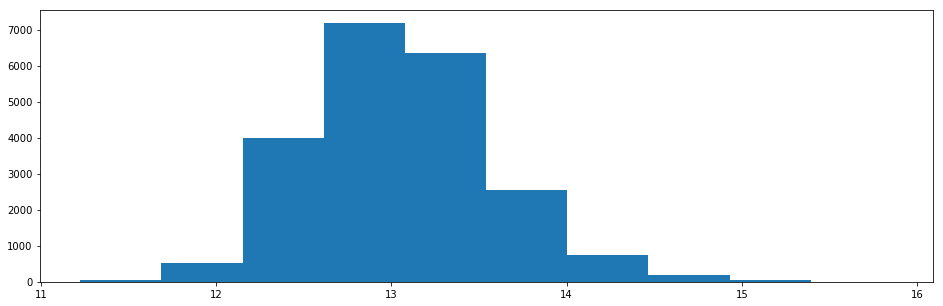

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize = (16, 5))
plt.hist(df_scaled['price'], bins = 10)
plt.show()

df_scaled['price'] = np.log(df['price'])
df_scaled.head()
df_scaled.describe()

plt.figure(figsize = (16, 5))
plt.hist(df_scaled['price'], bins = 10)
plt.show()

<span style="font-size:12pt">
En las mediciones se midieron 18 atributos distintos, en diferentes escalas, dinero, cantidad de piezas, baños, etc. Entonces para dejar todas las cantidades en la misma escala es necesario realizar la estandarización. <br>
Al ver el histograma del precio después de estandarizar se aprecia que la gran mayoria de los datos se concetra al inicio (pegados al eje y), entonces es necesario realizar una transformación para que los datos se repartan de mejor manera a lo largo del eje. Se observa que los datos presentan un comportamiento exponencial decreciente, entonces se aplica el logaritmo para que así estos se puedan diferenciar unos de otros.<br><br>
d)
</span>

In [6]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
#use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1

print(istrain)

Xtrain = X[istrain]
print(Xtrain.shape)

ytrain = y[istrain]
print(ytrain.shape)

Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

linreg.coef_.shape

[ True  True  True ..., False False False]
(15129, 18)
(15129,)


(18,)